In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import pandasql as ps
import math
import itertools

#import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': '--'})
#date libraries
from dateutil import parser
from datetime import datetime, timedelta, date
import holidays



#prophet library
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation

In [2]:
df1= pd.read_csv("Plant_1_Generation_Data.csv")
df2= pd.read_csv("Plant_2_Generation_Data.csv")
df3= pd.read_csv("Plant_1_Weather_Sensor_Data.csv")
df4= pd.read_csv("Plant_2_Weather_Sensor_Data.csv")

In [3]:
df1.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
df2.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [5]:
df3.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [6]:
df4.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [7]:
# Merging Plant 1 files and Plant 2 data
merged_df1 = pd.merge(df1, df3, on='DATE_TIME', how='inner')  
merged_df2 = pd.merge(df2, df4, on='DATE_TIME', how='inner')  

df = pd.concat([merged_df1, merged_df2], ignore_index=True)

In [8]:
df.head(5)

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0


In [9]:
df.drop(['SOURCE_KEY_x'],axis=1)

,DATE_TIME,PLANT_ID_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,0.0,0.0,9425.000000,2.429011e+06,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:00:00,4136001,0.0,0.0,0.000000,1.215279e+09,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
2,2020-05-15 00:00:00,4136001,0.0,0.0,3075.333333,2.247720e+09,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
3,2020-05-15 00:00:00,4136001,0.0,0.0,269.933333,1.704250e+06,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
4,2020-05-15 00:00:00,4136001,0.0,0.0,3177.000000,1.994153e+07,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
...,...,...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,0.0,0.0,4157.000000,5.207580e+05,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
67694,2020-06-17 23:45:00,4136001,0.0,0.0,3931.000000,1.211314e+08,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
67695,2020-06-17 23:45:00,4136001,0.0,0.0,4322.000000,2.427691e+06,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
67696,2020-06-17 23:45:00,4136001,0.0,0.0,4218.000000,1.068964e+08,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0


In [11]:
df.shape

(67698, 12)

In [12]:
#converting into datetime format

In [13]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format="%Y-%m-%d %H:%M:%S")
df['Date'] = df['DATE_TIME'].dt.date
df['Time'] = df['DATE_TIME'].dt.time

In [14]:
df.head(5)

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Date,Time
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,2020-05-15,00:00:00
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,2020-05-15,00:00:00
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,2020-05-15,00:00:00
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,2020-05-15,00:00:00
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,2020-05-15,00:00:00


In [15]:
df.drop(['SOURCE_KEY_x','SOURCE_KEY_y',],axis=1,inplace=True)
df.head(5)

,DATE_TIME,PLANT_ID_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Date,Time
0,2020-05-15,4136001,0.0,0.0,9425.000000,2.429011e+06,4136001,27.004764,25.060789,0.0,2020-05-15,00:00:00
1,2020-05-15,4136001,0.0,0.0,0.000000,1.215279e+09,4136001,27.004764,25.060789,0.0,2020-05-15,00:00:00
2,2020-05-15,4136001,0.0,0.0,3075.333333,2.247720e+09,4136001,27.004764,25.060789,0.0,2020-05-15,00:00:00
3,2020-05-15,4136001,0.0,0.0,269.933333,1.704250e+06,4136001,27.004764,25.060789,0.0,2020-05-15,00:00:00
4,2020-05-15,4136001,0.0,0.0,3177.000000,1.994153e+07,4136001,27.004764,25.060789,0.0,2020-05-15,00:00:00


In [16]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   PLANT_ID_x           67698 non-null  int64         
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   PLANT_ID_y           67698 non-null  int64         
 7   AMBIENT_TEMPERATURE  67698 non-null  float64       
 8   MODULE_TEMPERATURE   67698 non-null  float64       
 9   IRRADIATION          67698 non-null  float64       
 10  Date                 67698 non-null  object        
 11  Time                 67698 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 6.2+ MB


In [17]:
df.describe()

,DATE_TIME,PLANT_ID_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,67698,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04,67698.0,67698.000000,67698.000000,67698.000000
mean,2020-06-01 10:44:33.650625024,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08,4136001.0,27.986756,32.607233,0.229204
min,2020-05-15 00:00:00,4136001.0,0.000000,0.000000,0.000000,0.000000e+00,4136001.0,20.942385,20.265123,0.000000
25%,2020-05-23 21:00:00,4136001.0,0.000000,0.000000,272.750000,1.996494e+07,4136001.0,24.570349,23.685627,0.000000
50%,2020-06-01 23:00:00,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08,4136001.0,26.910352,27.433723,0.018554
75%,2020-06-09 23:30:00,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09,4136001.0,30.912601,40.019036,0.431027
max,2020-06-17 23:45:00,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09,4136001.0,39.181638,66.635953,1.098766
std,NaN,0.0,370.569597,362.112118,2919.448386,7.296678e+08,0.0,4.021294,11.226446,0.309365


<b>Power Generation:</b><br>
The power plant has significant energy production with high variability in DC and AC power generation.<br>
There are periods of no power generation, which could be due to maintenance, downtime, or nighttime.<br>
<b>Energy Yield:</b><br>
Daily and total energy yield varies significantly over time, influenced by factors like weather conditions, irradiation levels,<br> and operational efficiency.<br>
<b>Temperature Conditions:</b><br>
The power plant operates under a range of ambient and module temperatures, which can impact the efficiency and performance of<br> solar panels.<br>
<b>Solar Radiation:</b><br>
The plant experiences varying levels of solar radiation, influencing the energy production and performance of solar panels.<br>
<b>Data Completeness:</b><br>
The count for all variables is consistent, indicating complete data for the observed period.

In [18]:
min(df['Date']),max(df['Date'])

(datetime.date(2020, 5, 15), datetime.date(2020, 6, 17))

In [19]:
#impact of weather condition on solar power generation

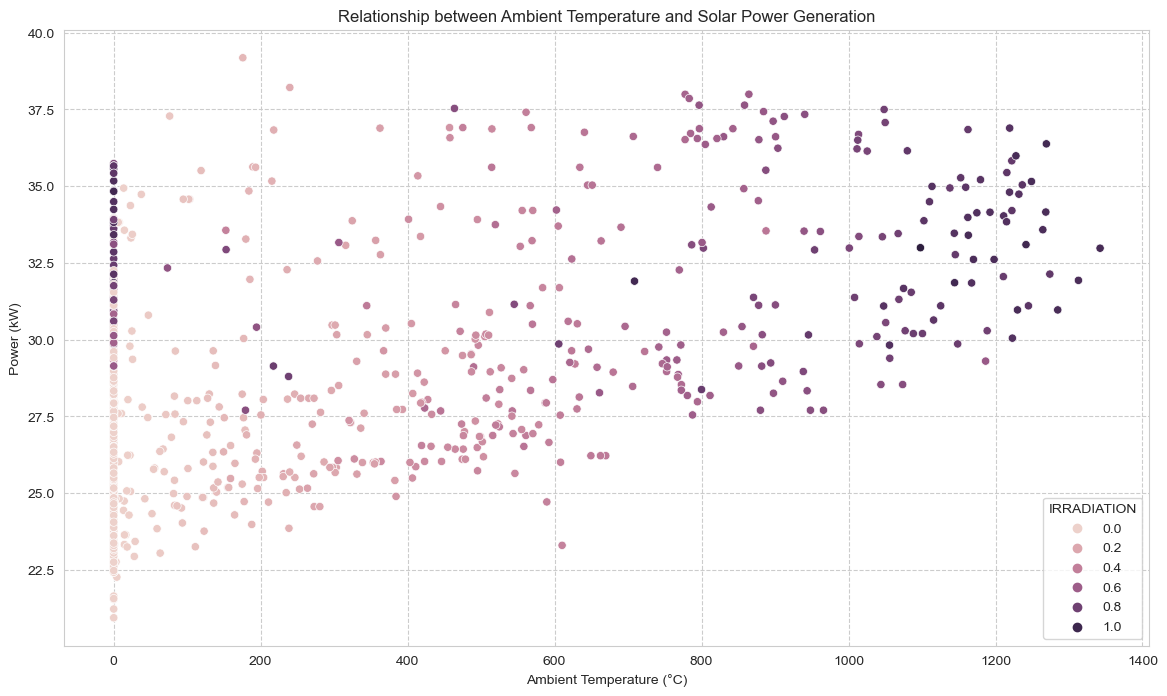

In [20]:
# Relationship Analysis (Scatter Plot)
plt.figure(figsize=(14, 8))
sns.scatterplot(x='AC_POWER', y='AMBIENT_TEMPERATURE',hue='IRRADIATION', data=df.sample(n=1000))  
plt.title('Relationship between Ambient Temperature and Solar Power Generation')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Power (kW)')
plt.grid(True)
plt.show()

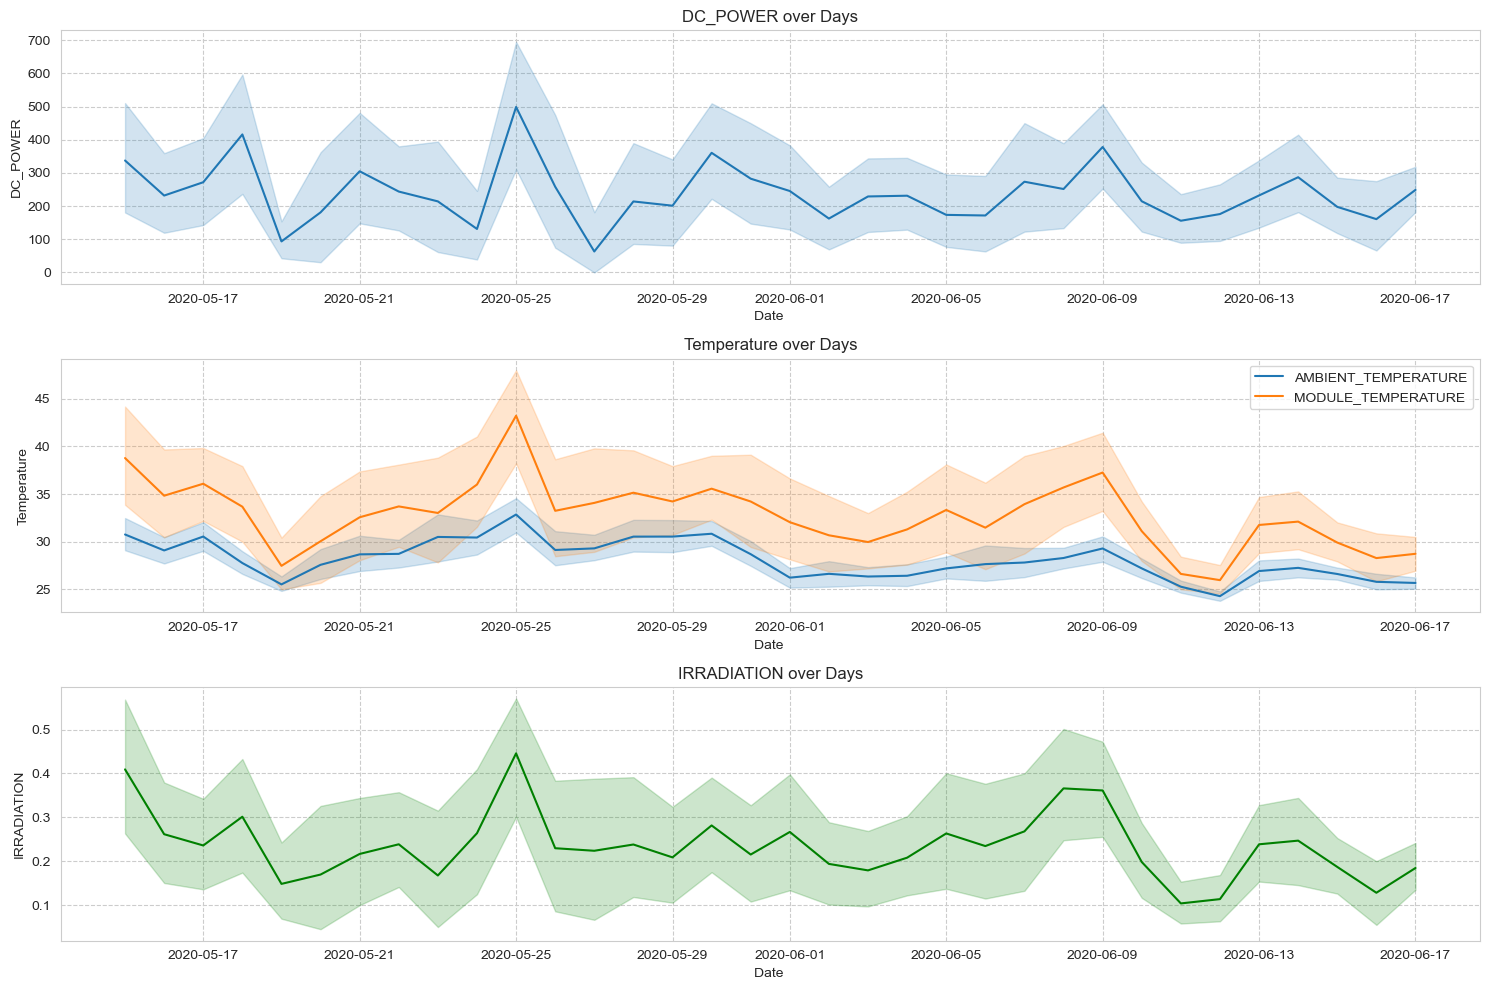

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample subset of data for faster plotting (replace this with your dataframe df)
df_sample = df.sample(n=1000)
# Convert time-related columns to datetime format
df_sample['Date'] = pd.to_datetime(df_sample['Date'])

# Sort data by DATE_TIME
df_sample = df_sample.sort_values(by='Date')

# Create line plots
plt.figure(figsize=(15, 10))

# DC_POWER over time
plt.subplot(3, 1, 1)
sns.lineplot(x='Date', y='AC_POWER', data=df_sample)
plt.title('DC_POWER over Days')
plt.xlabel('Date ')
plt.ylabel('DC_POWER')

# AMBIENT_TEMPERATURE and MODULE_TEMPERATURE over time
plt.subplot(3, 1, 2)
sns.lineplot(x='Date', y='AMBIENT_TEMPERATURE', data=df_sample, label='AMBIENT_TEMPERATURE')
sns.lineplot(x='Date', y='MODULE_TEMPERATURE', data=df_sample, label='MODULE_TEMPERATURE')
plt.title('Temperature over Days')
plt.xlabel('Date ')
plt.ylabel('Temperature')
plt.legend()

# IRRADIATION over time
plt.subplot(3, 1, 3)
sns.lineplot(x='Date', y='IRRADIATION', data=df_sample, color='green')
plt.title('IRRADIATION over Days')
plt.xlabel('Date ')
plt.ylabel('IRRADIATION')

# Adjust layout
plt.tight_layout()


# Display the plots
plt.show()


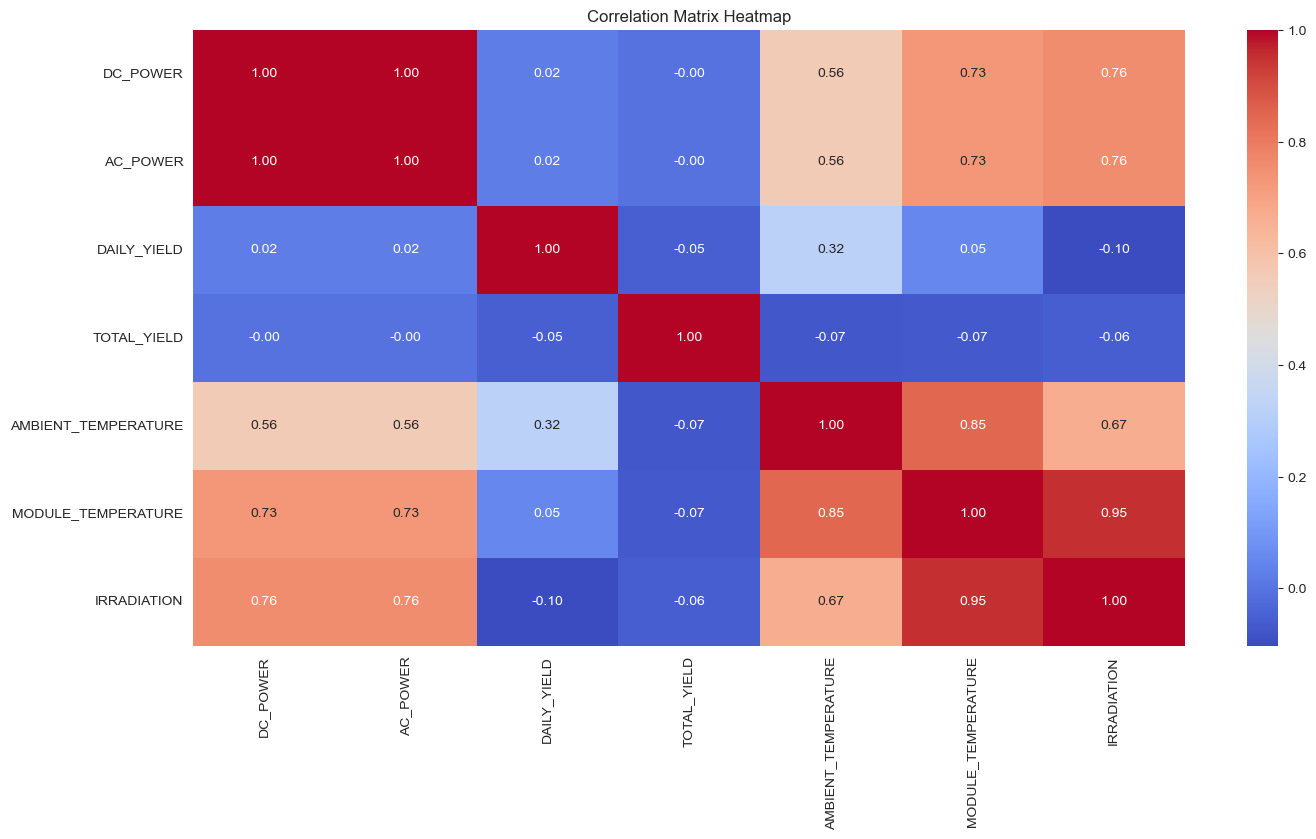

In [22]:
# Sample subset of data for faster plotting (replace this with your dataframe df)
df_sample = df.sample(n=1000)

# Compute the correlation matrix
corr = df_sample[['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 
                         'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].corr()

# Plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


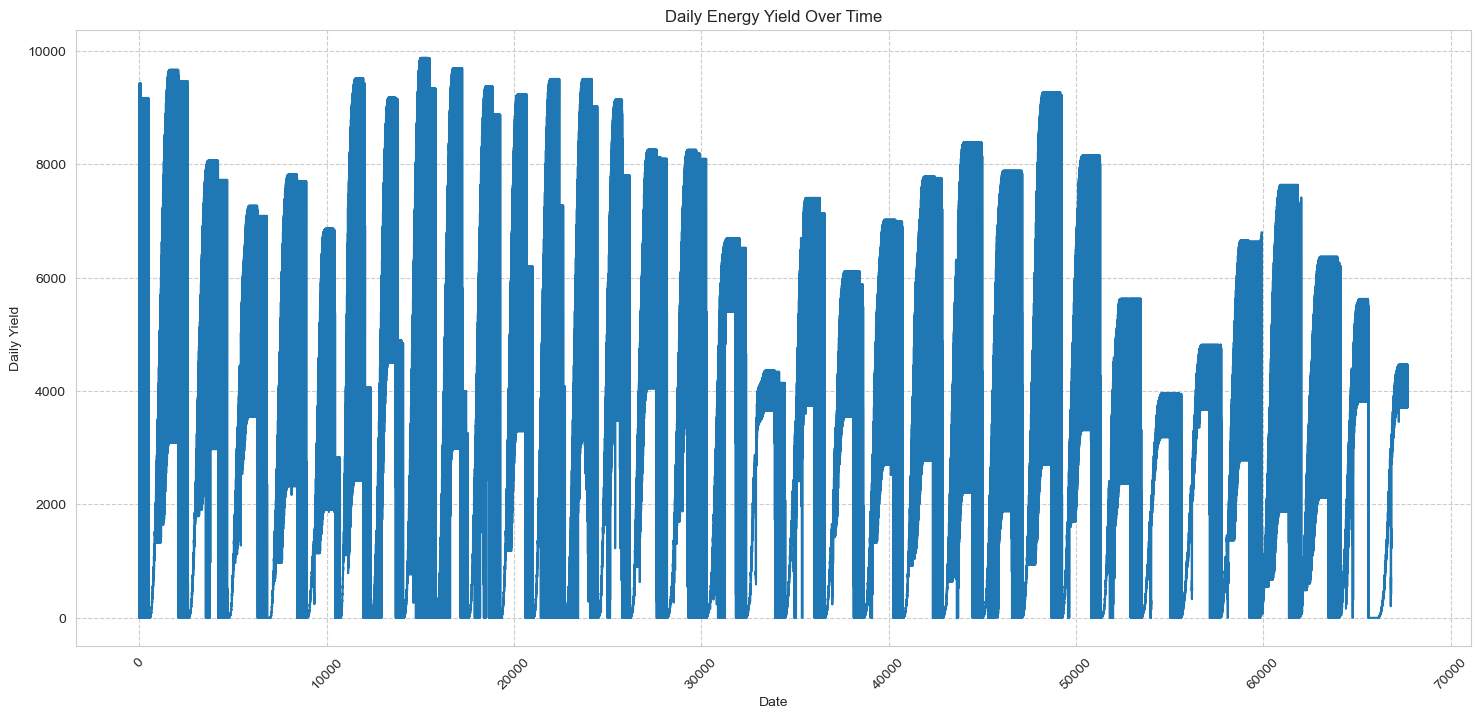

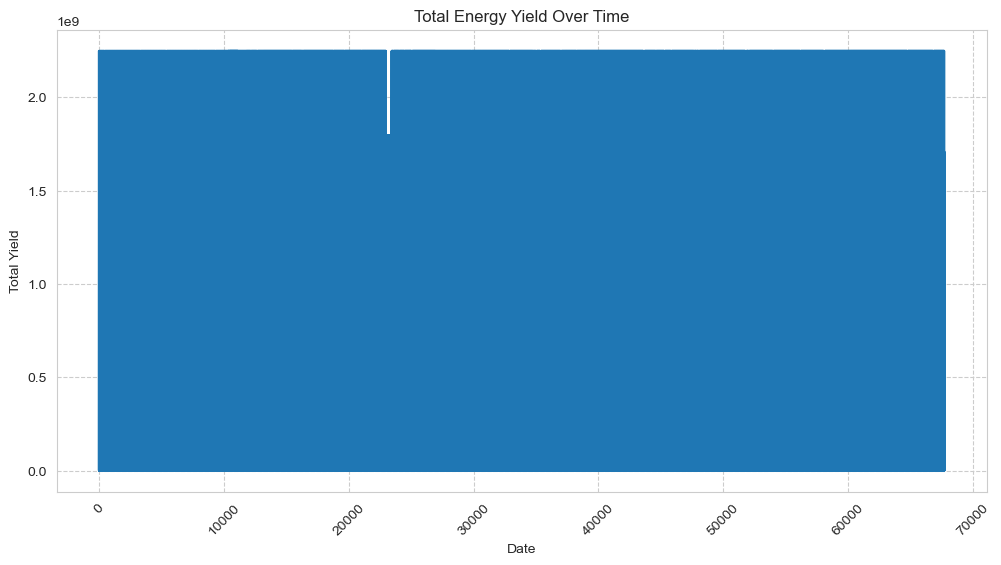

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting DAILY_YIELD over time using seaborn
plt.figure(figsize=(18, 8))
sns.lineplot(data=df['DAILY_YIELD'])
plt.title('Daily Energy Yield Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Yield')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plotting TOTAL_YIELD over time using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df['TOTAL_YIELD'])
plt.title('Total Energy Yield Over Time')
plt.xlabel('Date')
plt.ylabel('Total Yield')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
#Seasonal Variations in Energy Production:

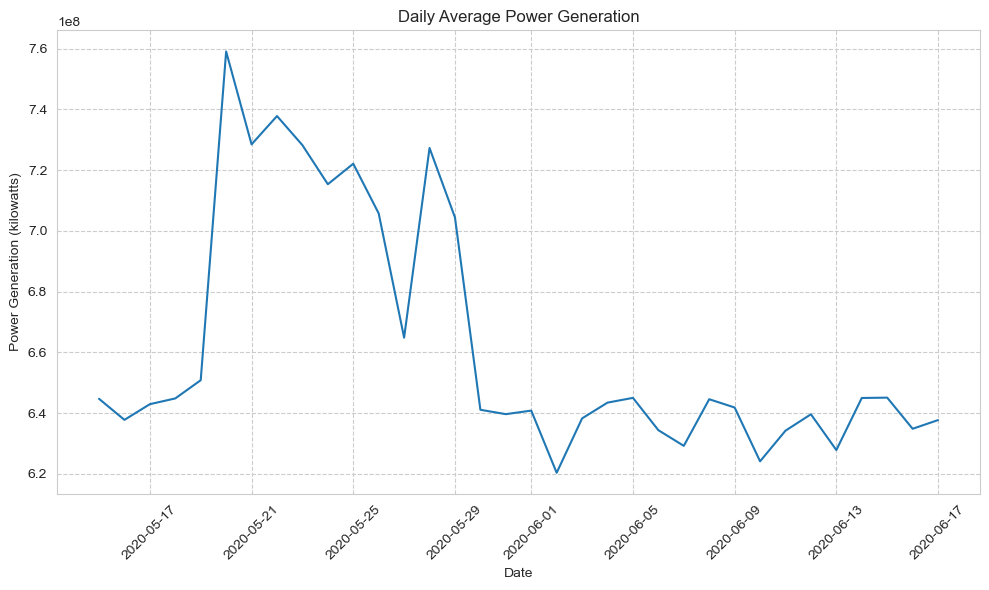

In [26]:
# Group by date and calculate daily average power generation
daily_avg_generation = df.groupby(df['Date'])['TOTAL_YIELD'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_generation.index, daily_avg_generation.values, linestyle='-')
plt.title('Daily Average Power Generation')
plt.xlabel('Date')
plt.ylabel('Power Generation (kilowatts)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


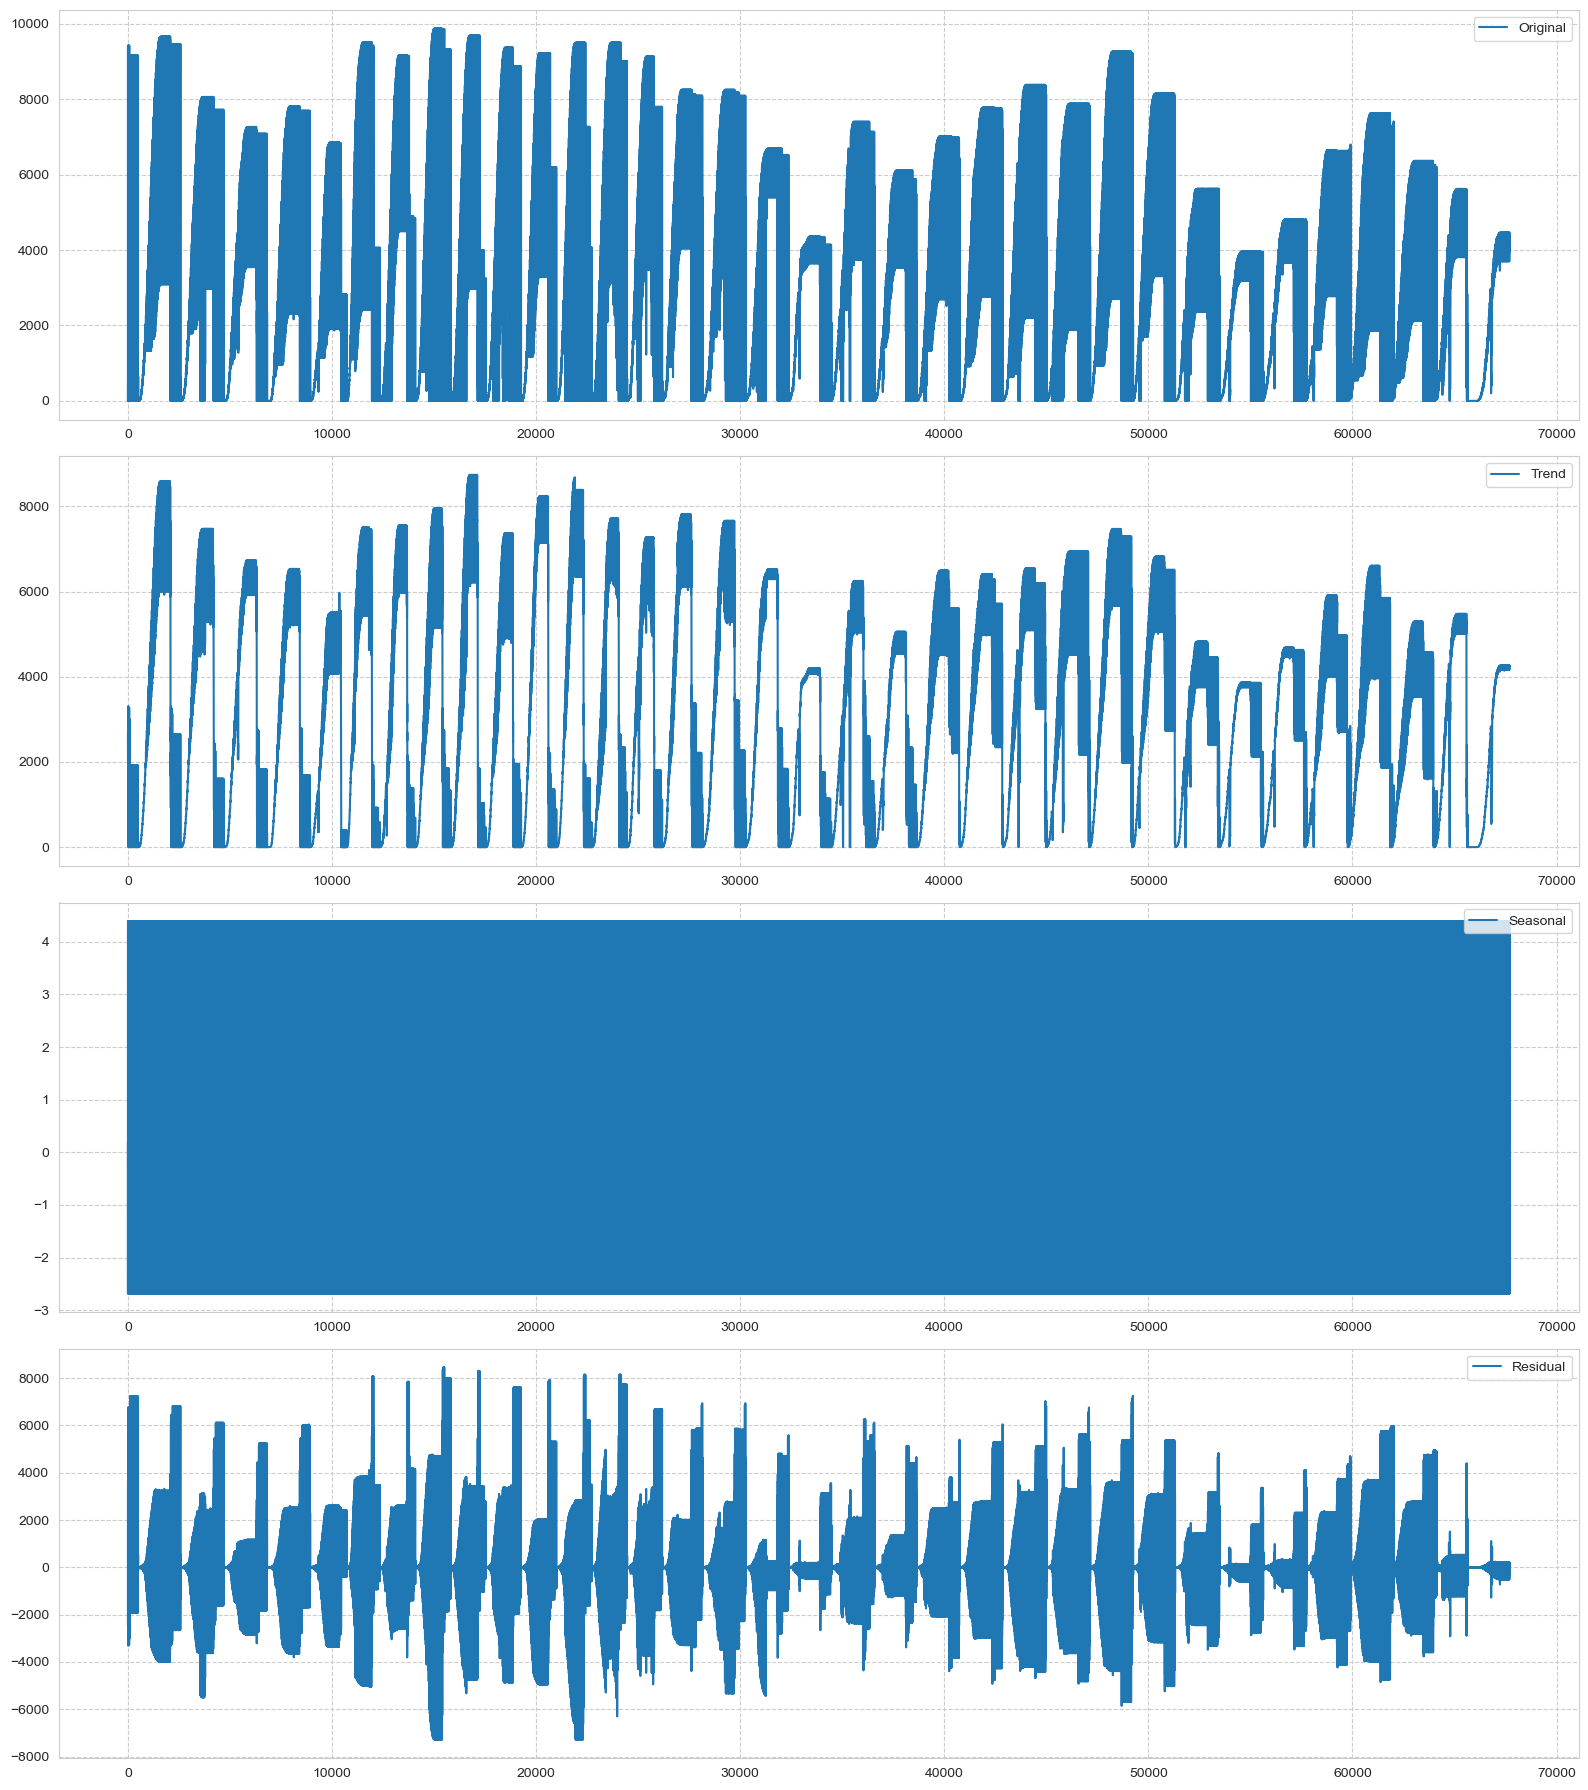

In [27]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['DAILY_YIELD'], model='additive', period=7)  # Adjust period as needed

# Plot the decomposed components
plt.figure(figsize=(16, 18))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(df.index, df['DAILY_YIELD'], label='Original')
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend.index, result.trend, label='Trend')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal.index, result.seasonal, label='Seasonal')
plt.legend()

# Residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid.index, result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


In [28]:
# Assuming df contains your dataframe with the 'Date' column
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and season from 'Date' column
df['Month'] = df['Date'].dt.month
df['Season'] = (df['Date'].dt.month % 12 + 3) // 3

In [29]:
#We use sns.boxplot() to create a box plot of DAILY_YIELD across different months, highlighting the median, quartiles,
#and outliers.

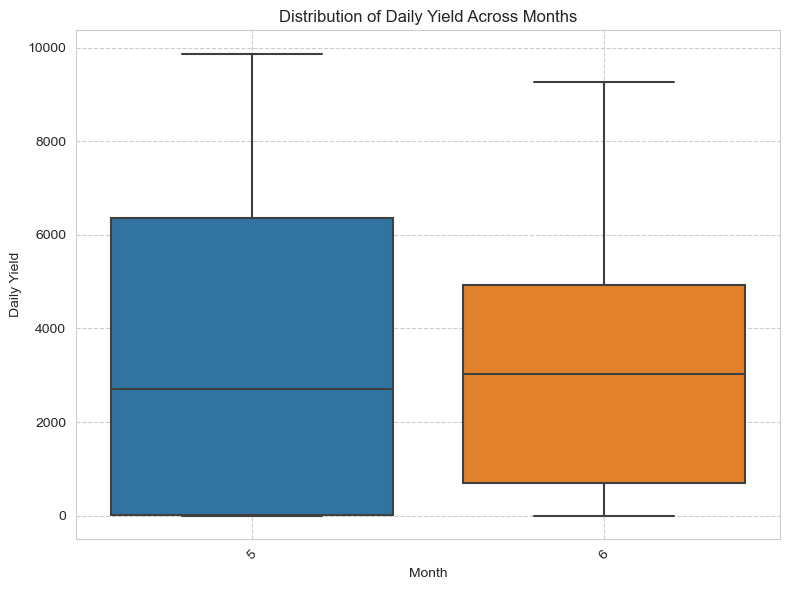

In [30]:
# Plotting box plot for DAILY_YIELD across months
plt.figure(figsize=(8, 6))
sns.boxplot(x='Month', y='DAILY_YIELD', data=df)
plt.title('Distribution of Daily Yield Across Months')
plt.xlabel('Month')
plt.ylabel('Daily Yield')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
#We use sns.violinplot() to create a violin plot of TOTAL_YIELD across different seasons, 
#showing the distribution of data density.

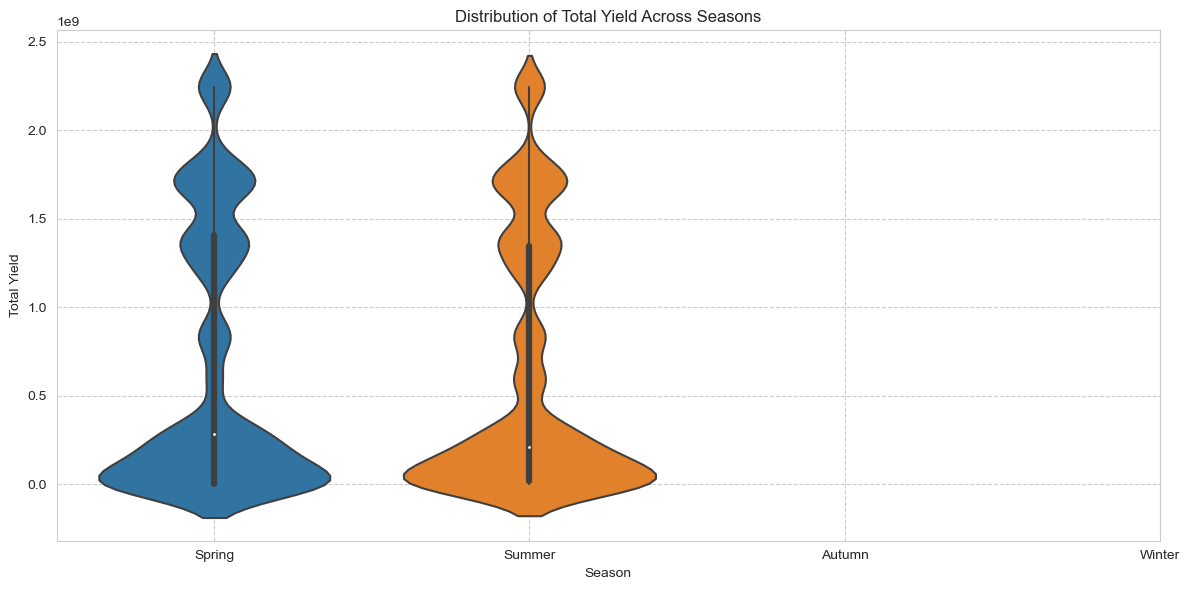

In [32]:
# Plotting violin plot for TOTAL_YIELD across seasons
plt.figure(figsize=(12, 6))
sns.violinplot(x='Season', y='TOTAL_YIELD', data=df)
plt.title('Distribution of Total Yield Across Seasons')
plt.xlabel('Season')
plt.ylabel('Total Yield')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Autumn', 'Winter'])
plt.grid(True)
plt.tight_layout()
plt.show()

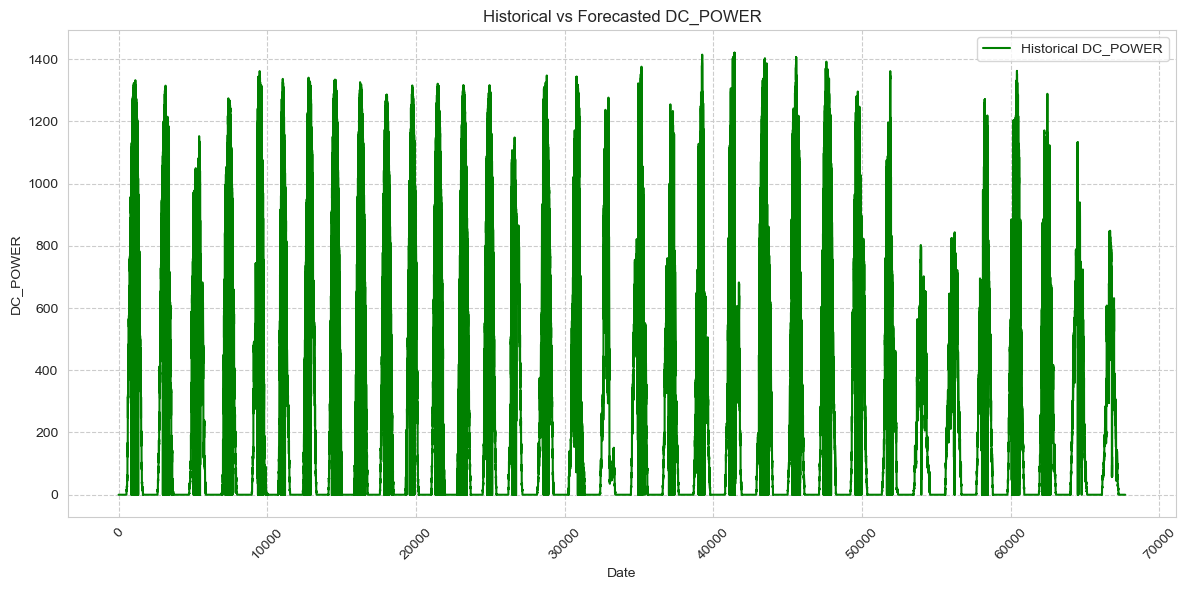

In [33]:

# Plotting historical data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['DC_POWER'], label='Historical DC_POWER', color='GREEN')

# Insert your forecasted values here
# Replace 'Forecasted_DC_POWER' with the actual column name containing your forecasted DC_POWER values
# Replace forecast_df with the actual dataframe containing your forecasted values
# plt.plot(forecast_df.index, forecast_df['Forecasted_DC_POWER'], label='Forecasted DC_POWER', linestyle='--', color='red')

plt.title('Historical vs Forecasted DC_POWER')
plt.xlabel('Date')
plt.ylabel('DC_POWER')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
min(df['Date'])

Timestamp('2020-05-15 00:00:00')

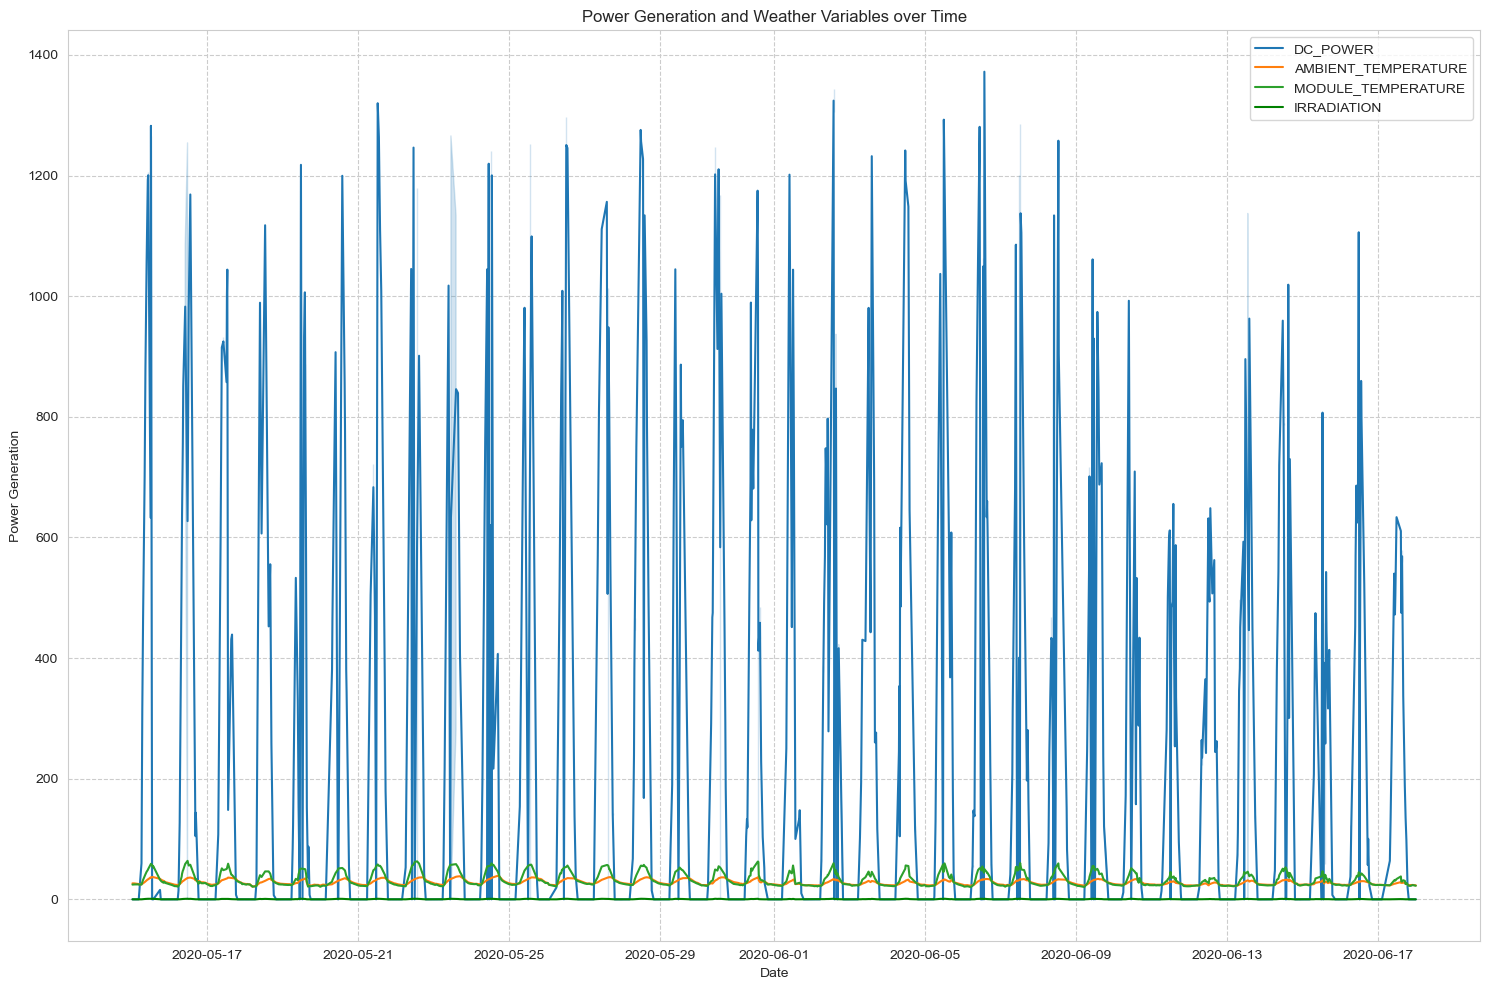

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample subset of data for faster plotting (replace this with your dataframe df)
df_sample = df.sample(n=1000)

# Convert time-related columns to datetime format
df_sample['DATE_TIME'] = pd.to_datetime(df_sample['DATE_TIME'])

# Sort data by DATE_TIME
df_sample = df_sample.sort_values(by='DATE_TIME')

# Create line plot
plt.figure(figsize=(15, 10))

# Plot DC_POWER over time
sns.lineplot(x='DATE_TIME', y='DC_POWER', data=df_sample, label='DC_POWER')

# Plot AMBIENT_TEMPERATURE and MODULE_TEMPERATURE over time
sns.lineplot(x='DATE_TIME', y='AMBIENT_TEMPERATURE', data=df_sample, label='AMBIENT_TEMPERATURE')
sns.lineplot(x='DATE_TIME', y='MODULE_TEMPERATURE', data=df_sample, label='MODULE_TEMPERATURE')

# Plot IRRADIATION over time
sns.lineplot(x='DATE_TIME', y='IRRADIATION', data=df_sample, label='IRRADIATION', color='green')

# Add title and labels
plt.title('Power Generation and Weather Variables over Time')
plt.xlabel('Date')
plt.ylabel('Power Generation')

# Display the legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [11]:
df.columns

Index(['DATE_TIME', 'PLANT_ID_x', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'PLANT_ID_y', 'SOURCE_KEY_y',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')

In [10]:
#feature enginnerring

In [18]:
import pandas as pd

# Assuming df is your DataFrame containing the data
# Convert 'DATE_TIME' column to datetime format (just to ensure)
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])

# Extract additional features from the 'DATE_TIME' column
df['day_of_week'] = df['DATE_TIME'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
df['month'] = df['DATE_TIME'].dt.month  # Month of the year
df['season'] = (df['DATE_TIME'].dt.month % 12 + 3) // 3  # Season (1=Spring, 2=Summer, 3=Autumn, 4=Winter)

# Consider incorporating lag features (e.g., previous day's DC_POWER and AC_POWER)
df['lastday_DC_POWER'] = df['DC_POWER'].shift(1)  # Lag feature for the previous day's DC_POWER
df['lastday_POWER'] = df['AC_POWER'].shift(1)  # Lag feature for the previous day's AC_POWER

# Consider incorporating moving averages (e.g., 7-day moving average of AMBIENT_TEMPERATURE)
df['rolling_avg_AMBIENT_TEMP'] = df['AMBIENT_TEMPERATURE'].mean()  # 7-day moving average of AMBIENT_TEMPERATURE

# Drop rows with NaN values resulting from lag features or moving averages
df.dropna(inplace=True)

# Display the DataFrame with the added features
print(df.head())


             DATE_TIME  PLANT_ID_x     SOURCE_KEY_x  DC_POWER  AC_POWER  \
37 2020-05-15 00:15:00     4136001  oZ35aAeoifZaQzV       0.0       0.0   
38 2020-05-15 00:15:00     4136001  oZZkBaNadn6DNKz       0.0       0.0   
39 2020-05-15 00:15:00     4136001  q49J1IKaHRwDQnt       0.0       0.0   
40 2020-05-15 00:15:00     4136001  rrq4fwE8jgrTyWY       0.0       0.0   
41 2020-05-15 00:15:00     4136001  vOuJvMaM2sgwLmb       0.0       0.0   

    DAILY_YIELD   TOTAL_YIELD  PLANT_ID_y     SOURCE_KEY_y  \
37          0.0  1.659965e+09     4136001  iq8k7ZNt4Mwm3w0   
38          0.0  1.708083e+09     4136001  iq8k7ZNt4Mwm3w0   
39       4315.0  3.399230e+05     4136001  iq8k7ZNt4Mwm3w0   
40          0.0  1.209641e+08     4136001  iq8k7ZNt4Mwm3w0   
41          0.0  2.211962e+06     4136001  iq8k7ZNt4Mwm3w0   

    AMBIENT_TEMPERATURE  ...  month  season  lag_DC_POWER  lag_AC_POWER  \
37            26.880811  ...      5       2           0.0           0.0   
38            26.880811  .

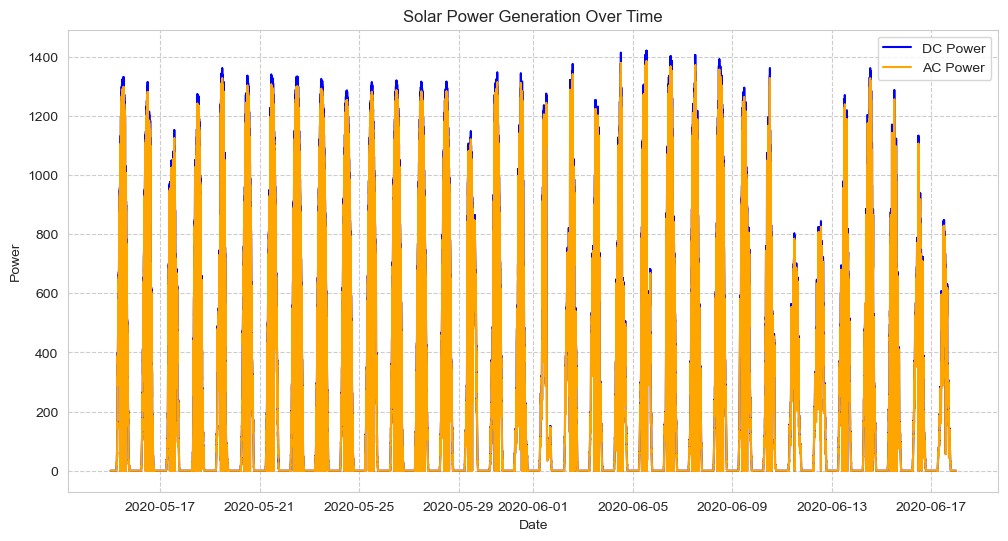

In [22]:
import matplotlib.pyplot as plt

# Plot DC_POWER and AC_POWER over time
plt.figure(figsize=(12, 6))
plt.plot(df['DATE_TIME'], df['DC_POWER'], label='DC Power', color='blue')
plt.plot(df['DATE_TIME'], df['AC_POWER'], label='AC Power', color='orange')
plt.xlabel('Date')
plt.ylabel('Power')
plt.title('Solar Power Generation Over Time')
plt.legend()
plt.show()


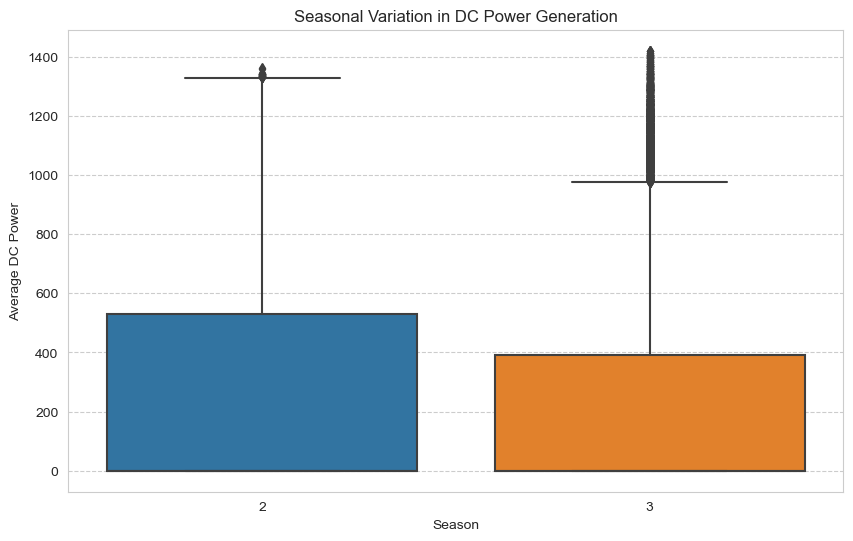

In [23]:
import seaborn as sns

# Plot average DC_POWER by season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='DC_POWER', data=df)
plt.xlabel('Season')
plt.ylabel('Average DC Power')
plt.title('Seasonal Variation in DC Power Generation')
plt.show()


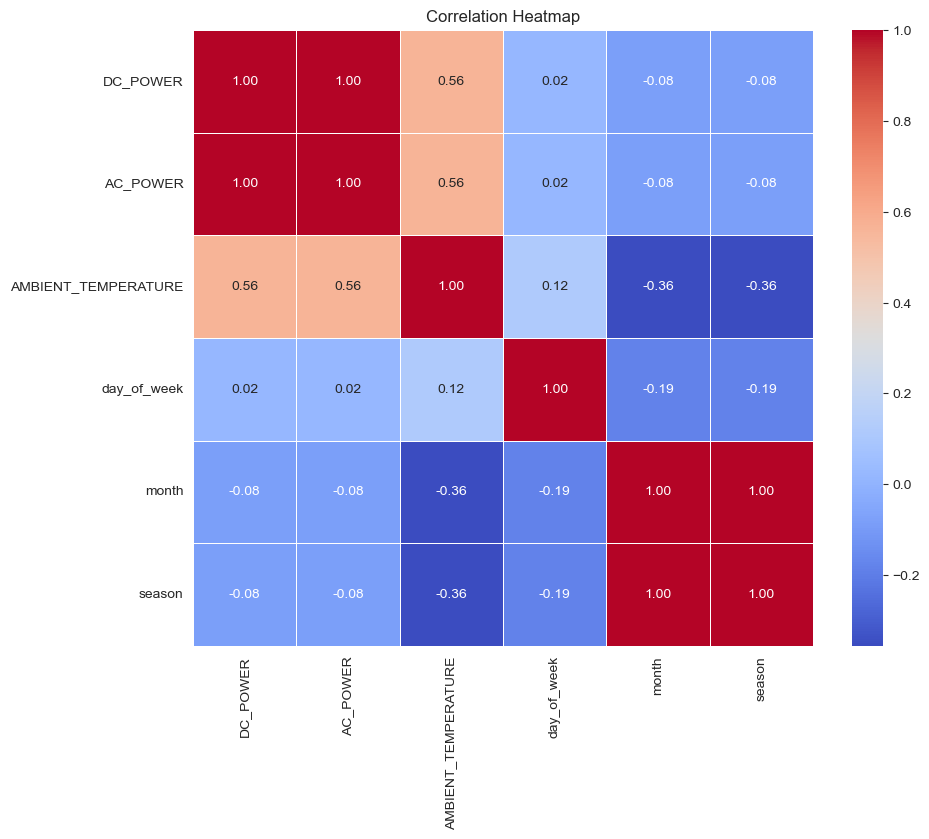

In [24]:
# Calculate correlation matrix
correlation_matrix = df[['DC_POWER', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'day_of_week', 'month', 'season']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


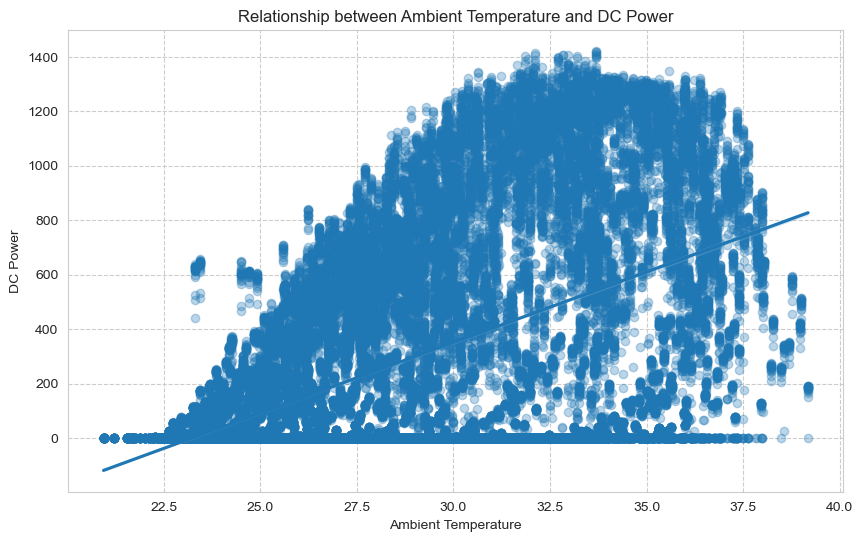

In [25]:
# Plot DC_POWER vs. AMBIENT_TEMPERATURE with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='AMBIENT_TEMPERATURE', y='DC_POWER', data=df, scatter_kws={'alpha':0.3})
plt.xlabel('Ambient Temperature')
plt.ylabel('DC Power')
plt.title('Relationship between Ambient Temperature and DC Power')
plt.show()


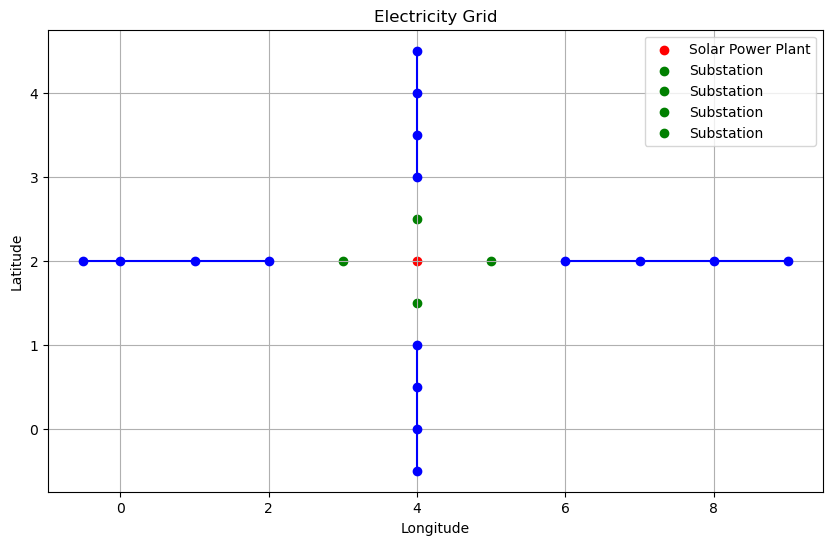

In [26]:
import matplotlib.pyplot as plt

# Plot a simple representation of an electricity grid
plt.figure(figsize=(10, 6))
plt.plot([4,4,4,4], [3,3.5,4,4.5], marker='o', color='blue', linestyle='-')
plt.plot([6,7,8,9], [2,2,2,2], marker='o', color='blue', linestyle='-')
plt.plot([-0.5,0, 1, 2], [2,2,2,2], marker='o', color='blue', linestyle='-')
plt.plot([4,4,4,4], [1,0.5,0,-0.5], marker='o', color='blue', linestyle='-')
plt.scatter([4], [2], color='red', label='Solar Power Plant')
plt.scatter([4], [1.5], color='green', label='Substation')
plt.scatter([3], [2], color='green', label='Substation')
plt.scatter([4], [2.5], color='green', label='Substation')
plt.scatter([5], [2], color='green', label='Substation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Electricity Grid')
plt.legend()
plt.grid(True)
plt.show()


Problem Statement
The project aims to analyze solar power generation data and corresponding weather data from two solar plants, Plant 1 and Plant 2. The goal is to understand the impact of weather conditions on solar power generation, identify seasonal variations in energy production, and assess the effectiveness of operational practices in maximizing energy output. This analysis will provide valuable insights into the performance, efficiency, and resilience of solar energy systems, contributing to the advancement of renewable energy technologies.

Objective
Understand the Impact of Weather Conditions on Solar Power Generation: Analyze how various weather factors (such as ambient temperature, module temperature, and irradiation) influence the power generation of the solar plants.
Identify Seasonal Variations in Energy Production: Investigate how energy production varies across different seasons and weather conditions.
Assess the Effectiveness of Operational Practices: Evaluate the current operational practices by comparing actual performance against potential performance and identifying areas for improvement.